# Data Analysis and Fitting
# Forward Models and Inverse Problems
Below an example of how to fit a non-linear forward model to non-linear data. Solving the inverse problem, solving for the frequency, f, using least-squares is also demonstrated.

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot
import numpy as np
import scipy
font = {'size'   : 18}
matplotlib.rc('font', **font)
# set the random seed; get the same results each time we run this notebook
seed = sum([ord(x) for x in 'isrschool'])
np.random.seed(seed)
f_true = 2.4

## Forward Model
Here we are working with a non-linear cosine model:
$y = cos(2\pi ft)$

For this example, we'll define the true values for the parameters to be:
* f = 2.4

In [2]:
def model(t,f):
    return np.cos(2*np.pi*f*t)

### Some measured data
Here we can generate some "measured data". Measurements have some error, so we'll add some by adding random numbers. Of course, in the real world, we get our measurements from an instrument! We don't generate the data ourselves...

In [3]:
t = np.linspace(0,1,num=51)
data = model(t,f=f_true) + 0.2*np.random.randn(t.size)

And we can plot these measurements

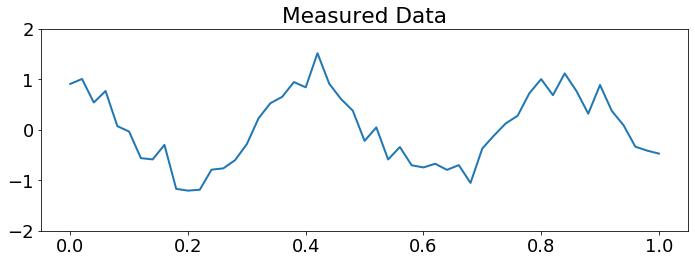

In [4]:
fig = pyplot.figure(figsize=(10,4))
ax = fig.add_subplot(111)
l = ax.plot(t,data,lw=2)
ax.set_title('Measured Data')
lim = ax.set_ylim([-2,2])
fig.tight_layout()

## The Inverse Problem: Solving for 'f' using Least-squares
We can estimate the frequency that "best fits" the data. Using the least-squares techniques, the "best fit" is the one that minimizes the sum:

$ \chi^2 = \sum^M_{m=1}{\frac{\left(d_m-y_m\right)^2}{\sigma_m^2}} $

where $d_m$ is the $m$-th data point and $y_m$ is the model evaluated at the $m$-th $x$ value. $\sigma_m$ is the error in the $m$-th data point, but we'll assume $\sigma_m=1$ for this example.

### The Brute Force Method

Usually, we know the domain of realistic values for model parameters. So let's calculate the chi-squared ($\chi^2$) value for all $f \in [-10,10] $. Then we can plot the chi-squared as a function of the model parameters:

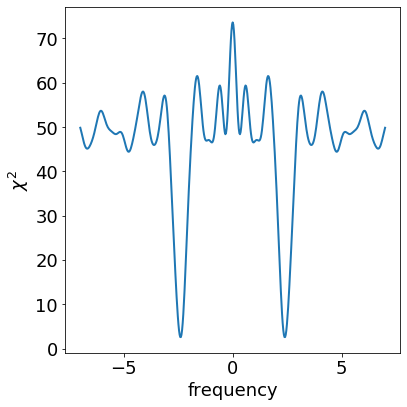

In [5]:
fs = np.linspace(-7,7,num=501)

chis = np.zeros((fs.size))
for i,f in enumerate(fs):
    diff = data - model(t,f=f)
    chis[i] = np.sum(diff**2)
        
#find the minimum        
min_chi = np.min(chis)
ind = np.where(chis==min_chi)[0]
best_f = fs[ind[1]]

# now plot
fig = pyplot.figure(figsize=(6,6))
ax = fig.add_subplot(111)
tmp = ax.plot(fs,chis,lw=2)
tmp = ax.set_xlabel('frequency')
tmp = ax.set_ylabel('$\chi^2$')
fig.tight_layout()

As we can see in the plot, there are clearly 2 solutions that minimize the chi-squared! This isn't surprising if we remember that:
$cos(x) = cos(-x)$

This demonstrates that having prior knowledge may be important (e.g. constrain frequencies we search over to positive frequencies only).

Also, note all of the local minima in the chi-squared. This indicates that the solution returned by any iterative non-linear technique, such as Levenburg-Marquardt, will be sensitive to the choice of initial guess!

True freq.: 2.40
Best fit freq.: 2.41


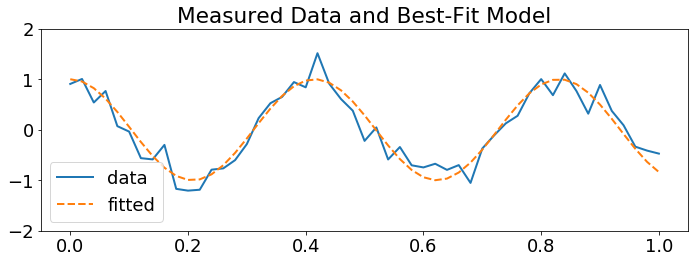

In [6]:
# use best fit parameters to generate a best-fit line:
best_fit = model(t,f=best_f)

# print best fit values and compare to true values
print('True freq.: %0.2f\nBest fit freq.: %0.2f' % (f_true,best_f))

#plot the data with the best-fit line on top
fig = pyplot.figure(figsize=(10,4))
ax = fig.add_subplot(111)
l = ax.plot(t,data,lw=2,label='data')
l = ax.plot(t,best_fit,'--',lw=2,label='fitted')
ax.set_title('Measured Data and Best-Fit Model')
ax.legend()
lim = ax.set_ylim([-2,2])
fig.tight_layout()